## 五、Plot Formatting

In [54]:
#plt.figure(); ts.plot(style='k--', label='Series');

### 1 Controlling the Legend

                   A         B         C         D
2000-01-01 -1.136183  0.515331 -1.665016  0.044897
2000-01-02 -1.025817 -0.459606  0.011666 -1.611901
2000-01-03 -1.899916 -1.766000  0.286560 -3.653845
2000-01-04 -1.100012 -2.150250  0.513180 -5.875060
2000-01-05 -0.962031 -3.038263  0.810086 -5.073168


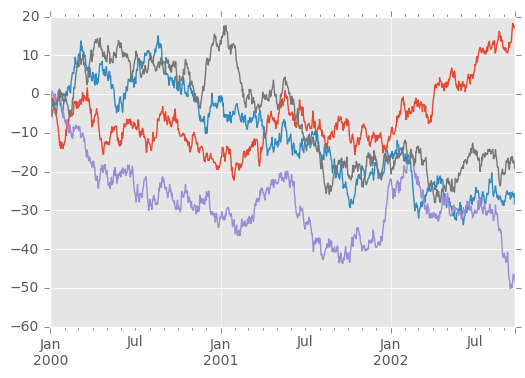

In [26]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000',periods=1000), columns=list('ABCD'))
df = df.cumsum()
print(df[:5])
df.plot(legend=False)

### 2 Scales

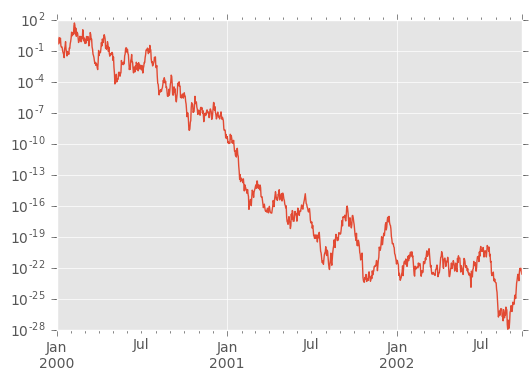

In [13]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
ts = np.exp(ts.cumsum())
ts.plot(logy=True)

### 3 Plotting on a Secondary Y-axis

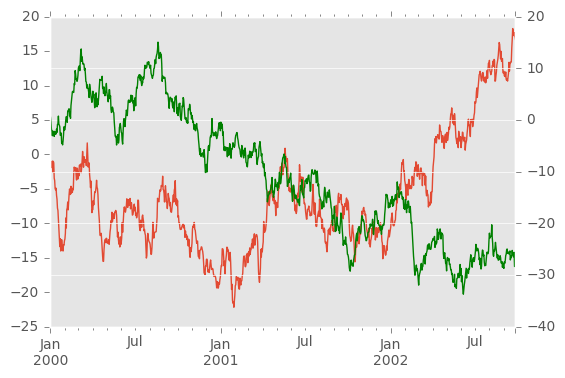

In [27]:
df.A.plot()
df.B.plot(secondary_y=True, style='g')

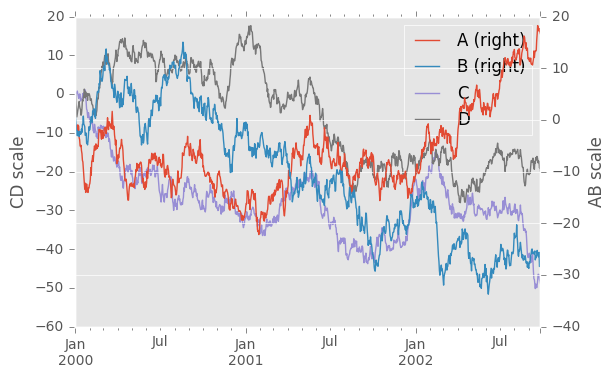

In [28]:
plt.figure()
ax = df.plot(secondary_y=['A', 'B'])
ax.set_ylabel('CD scale')
ax.right_ax.set_ylabel('AB scale')

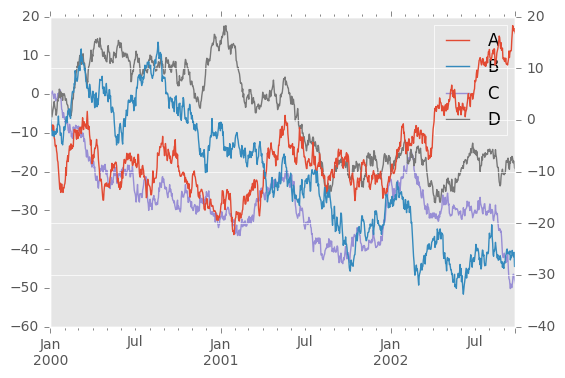

In [29]:
plt.figure()
df.plot(secondary_y=['A', 'B'], mark_right=False)

### 4 Suppressing Tick Resolution Adjustment

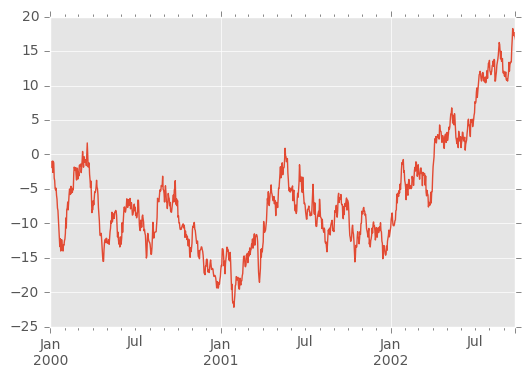

In [30]:
plt.figure()
df.A.plot()

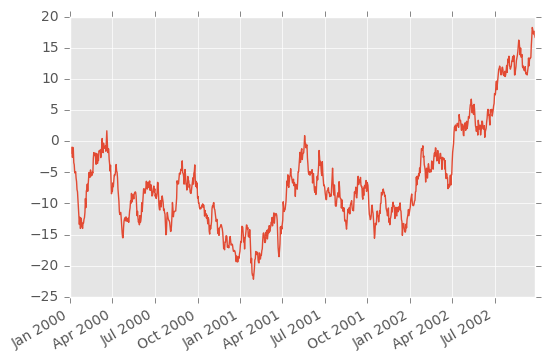

In [31]:
plt.figure()
df.A.plot(x_compat=True)

### 5 Subplots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000223A591D390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000223A5A57B38>], dtype=object)

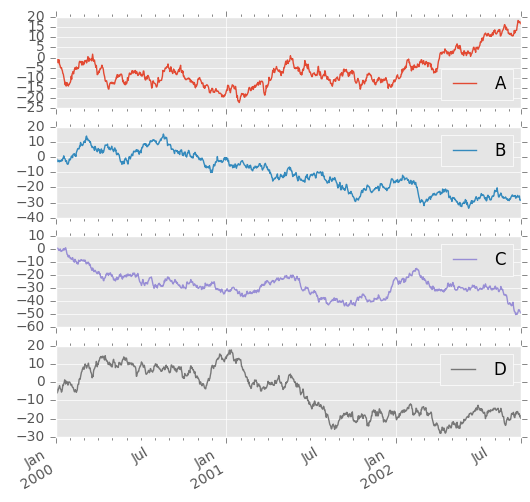

In [32]:
df.plot(subplots=True, figsize=(6, 6))

### 6 Using Layout and Targeting Multiple Axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223A5DD3C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000223A59E2C18>]], dtype=object)

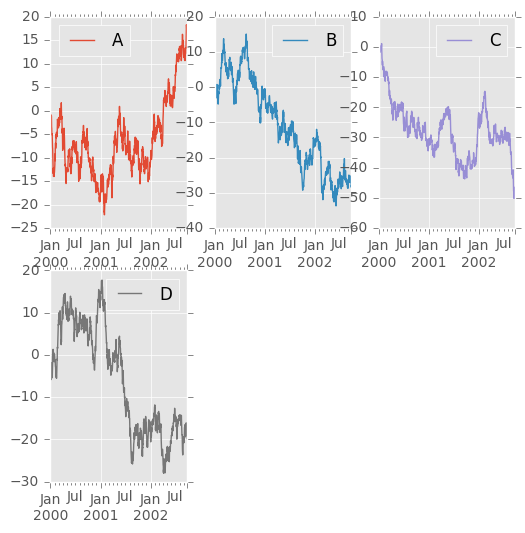

In [33]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False)

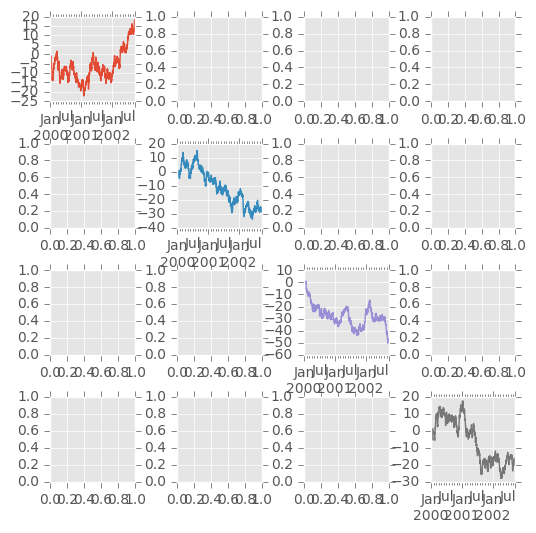

In [40]:
fig, axes = plt.subplots(4, 4, figsize=(6, 6));
plt.subplots_adjust(wspace=0.5, hspace=0.5);
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False, sharex=False,sharey=False);

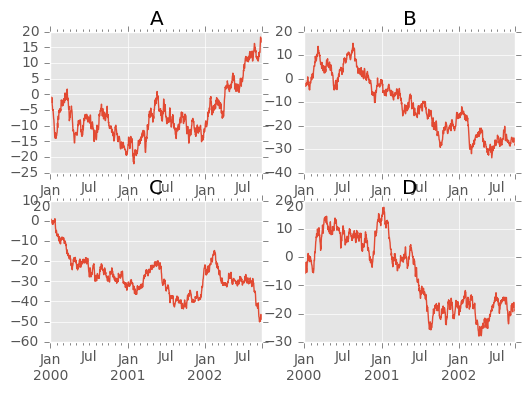

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2)
df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A');
df['B'].plot(ax=axes[0,1]); axes[0,1].set_title('B');
df['C'].plot(ax=axes[1,0]); axes[1,0].set_title('C');
df['D'].plot(ax=axes[1,1]); axes[1,1].set_title('D');

### 7 Plotting With Error Bars

In [44]:
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], [
         'foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], names=['letter', 'word'])
df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 'data2': [6, 5, 7, 5,
        4, 5, 6, 5]}, index=ix3)
# Group by index labels and take the means and standard deviations for each group
gp3 = df3.groupby(level=('letter', 'word'))
means = gp3.mean()
errors = gp3.std()

print(means)
errors

             data1  data2
letter word              
a      bar     3.5    6.0
       foo     2.5    5.5
b      bar     2.5    5.5
       foo     3.0    4.5


data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107

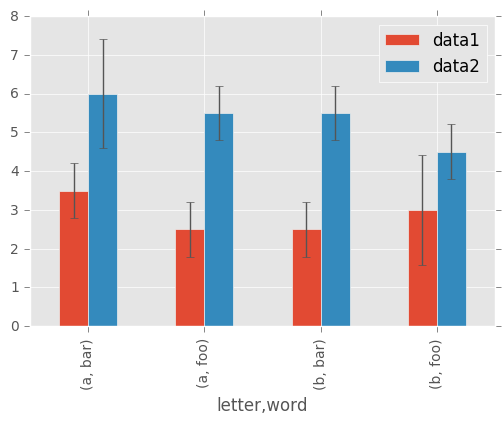

In [45]:
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax)

### 8 Plotting Tables

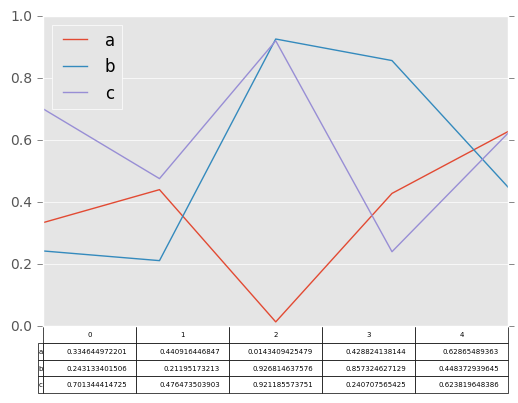

In [46]:
fig, ax = plt.subplots(1, 1)
df = pd.DataFrame(np.random.rand(5, 3), columns=['a', 'b', 'c'])
ax.get_xaxis().set_visible(False) # Hide Ticks
df.plot(table=True, ax=ax)

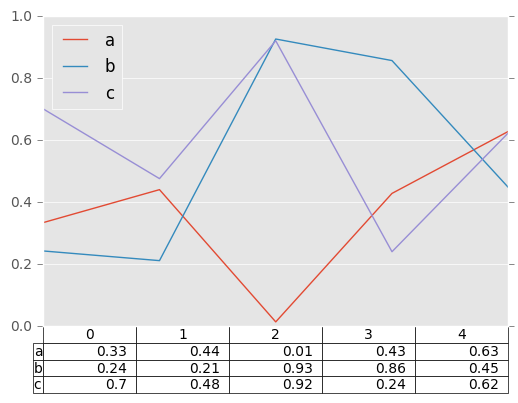

In [47]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False) # Hide Ticks
df.plot(table=np.round(df.T, 2), ax=ax)

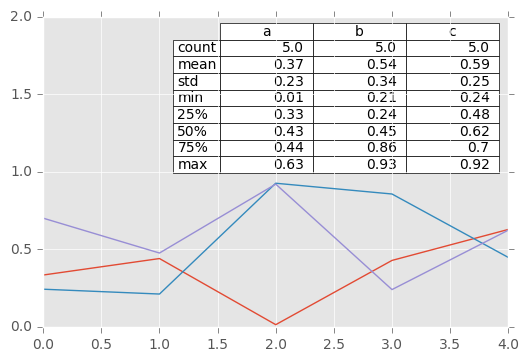

In [48]:
from pandas.tools.plotting import table

fig, ax = plt.subplots(1, 1)
table(ax, np.round(df.describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])
df.plot(ax=ax, ylim=(0, 2), legend=None)

### 9 Colormaps

In [49]:
df = pd.DataFrame(np.random.randn(1000, 10), index=pd.date_range('1/1/2000',periods=1000))
df = df.cumsum()
df[:5]

,0,1,2,3,4,5,6,7,8,9
2000-01-01,0.703026,0.286081,-0.520050,-0.683758,-0.781948,-0.099877,0.770018,-1.628521,-1.244127,-1.306978
2000-01-02,2.417535,-0.384919,-0.768633,-0.332983,0.154181,1.675273,0.344779,-1.736015,-2.705753,-2.090721
2000-01-03,1.166846,-2.212669,-1.855001,-0.133809,-1.983373,1.285016,-1.841312,-2.186229,-2.737719,-1.651349
2000-01-04,0.478792,-2.634564,-2.268240,0.349583,-2.853437,1.519602,-2.644620,-1.650243,-1.912412,-2.125943
2000-01-05,0.381326,-3.139801,-1.528047,1.321794,-3.726536,1.713682,-3.696950,-0.617844,-2.228966,-1.640901


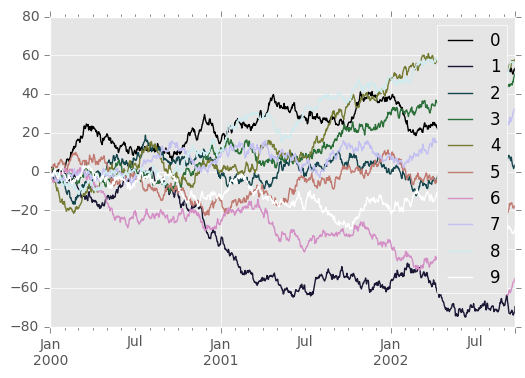

In [57]:
plt.figure()
df.plot(colormap='cubehelix')

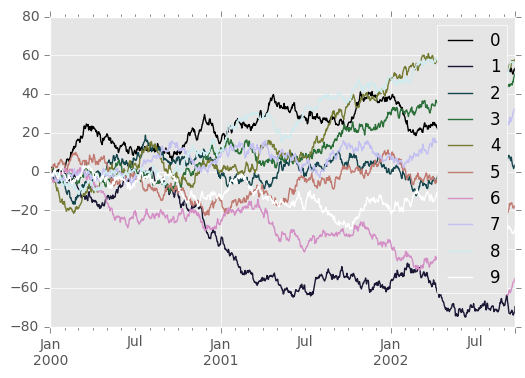

In [58]:
from matplotlib import cm

plt.figure()
df.plot(colormap=cm.cubehelix)

In [59]:
dd = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)
dd = dd.cumsum()
dd[:5]

,0,1,2,3,4,5,6,7,8,9
0,0.266973,0.629969,0.721821,0.258404,1.188548,0.342409,0.981313,0.607988,0.059688,2.948198
1,1.289664,1.938448,0.940109,2.632934,1.329596,1.336446,2.238615,2.132988,0.903423,4.436517
2,1.741734,3.143647,2.064620,3.667754,1.573931,1.410814,3.211274,2.889113,1.185361,5.111687
3,1.868661,4.313834,2.285714,3.693488,1.901416,3.456478,3.716742,3.305300,1.315371,5.889939
4,2.116710,4.606106,2.289127,4.605171,2.390864,3.506482,4.691259,3.800913,1.378365,6.664742


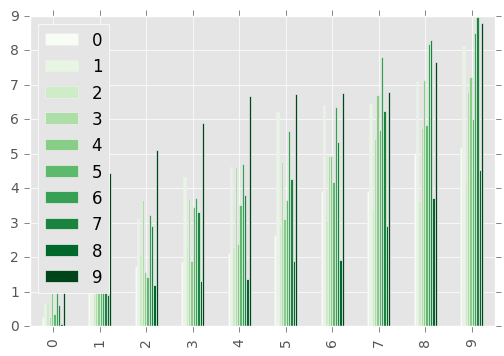

In [60]:
plt.figure()
dd.plot.bar(colormap='Greens')

## 六、Plotting directly with matplotlib

In [66]:
price = pd.Series(np.random.randn(150).cumsum(),index=pd.date_range('2000-1-1', periods=150, freq='B'))
ma = price.rolling(20).mean()
mstd = price.rolling(20).std()

print(ma[-5:])
mstd[-5:]

2000-07-24    3.876767
2000-07-25    3.863132
2000-07-26    4.018029
2000-07-27    4.210929
2000-07-28    4.309895
Freq: B, dtype: float64


2000-07-24    0.843996
2000-07-25    0.814461
2000-07-26    0.933921
2000-07-27    1.140832
2000-07-28    1.272407
Freq: B, dtype: float64

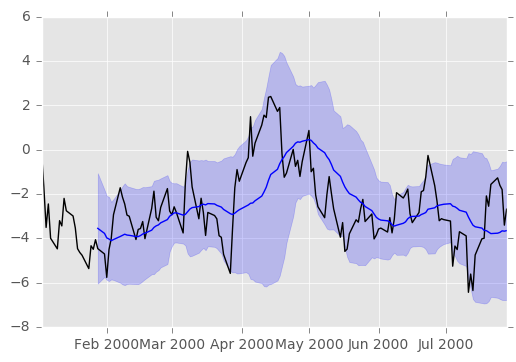

In [63]:
plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)